In [98]:
import numpy as np
import pandas as pd

In [99]:
df = pd.read_csv('tips.csv')

In [100]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [102]:
target = 'tip'
data = df.drop('tip',axis=1)

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

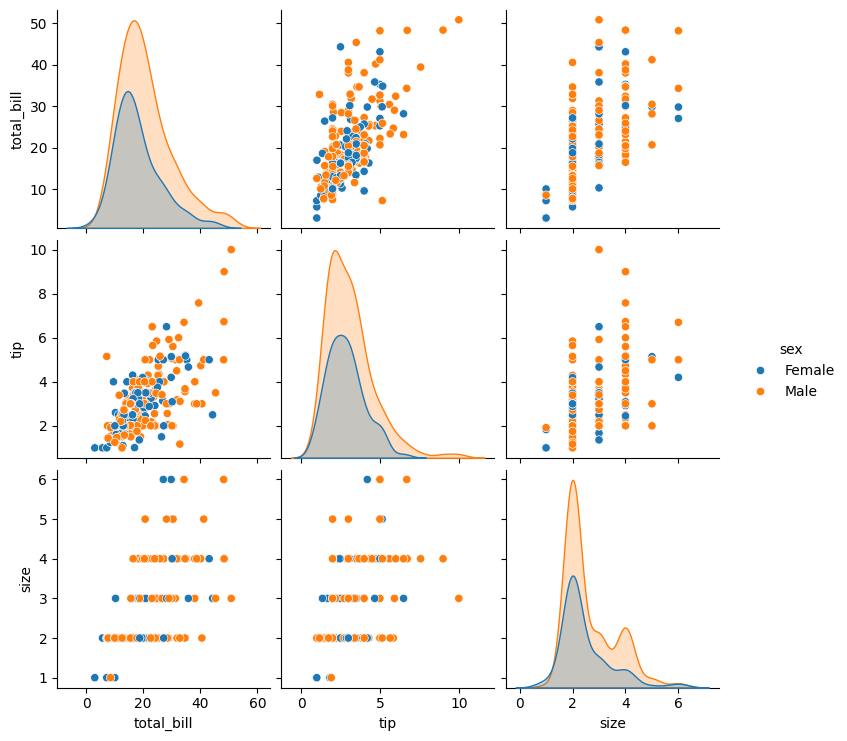

In [105]:
sns.pairplot(df, hue="sex")
plt.show()

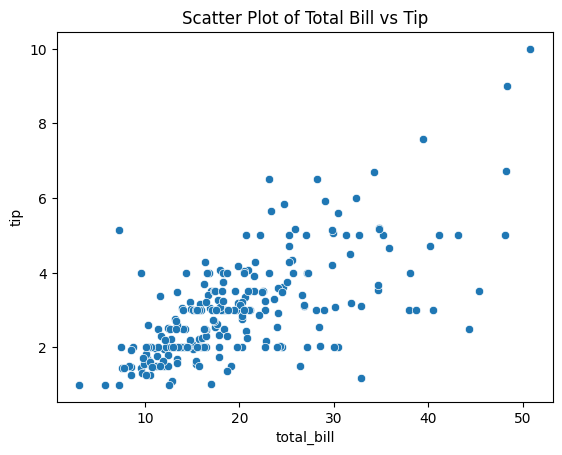

In [106]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

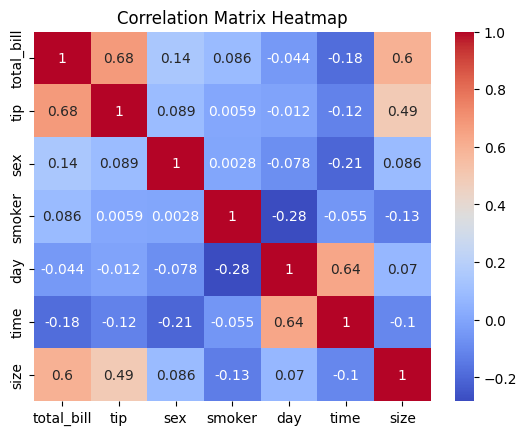

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])  # Encoding days (e.g., 'Sun' -> 3, 'Sat' -> 2)
df['time'] = label_encoder.fit_transform(df['time'])

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

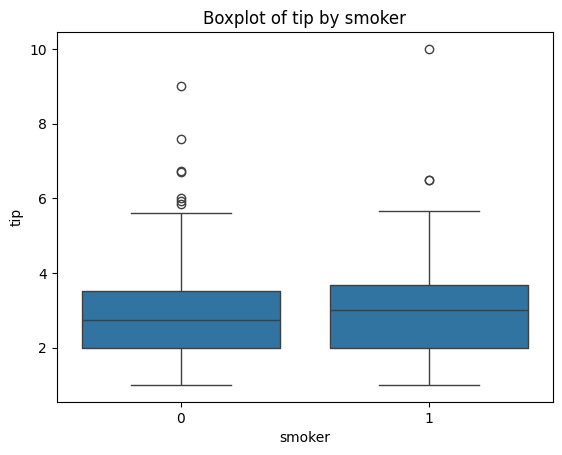

In [108]:
sns.boxplot(x="smoker", y="tip", data = df)
plt.title("Boxplot of tip by smoker")
plt.show()

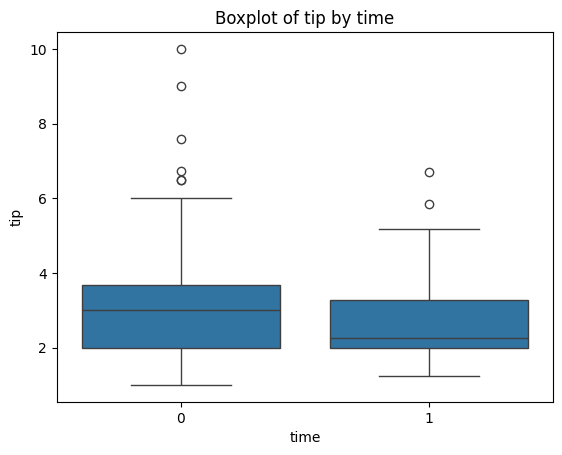

In [109]:
sns.boxplot(x="time", y="tip", data = df)
plt.title("Boxplot of tip by time")
plt.show()

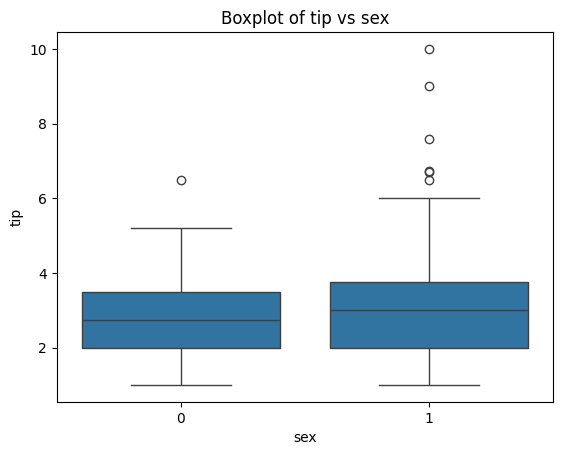

In [110]:
sns.boxplot(x="sex", y="tip", data = df)
plt.title("Boxplot of tip vs sex")
plt.show()

In [111]:
df = df.drop(['sex','time', 'smoker' , 'day'] , axis =1 )
#because the target variable doesnt depends much on these features

In [112]:
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score

In [114]:
df = pd.get_dummies(df, drop_first=True)

In [115]:
x = df[['total_bill']]  # Independent variable (predictor)
y = df['tip'] #dependent varible(target)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [117]:
# 1.Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Evaluating the model's performance
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", MSE)
print("R-squared(Coefficient of determination):", r2)

Mean Squared Error: 0.5688142529229538
R-squared(Coefficient of determination): 0.5449381659234663


In [118]:
# 2. Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("\nRidge Regression:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression:
R2 Score: 0.5449458342338539
MSE: 0.5688046677547027


In [119]:
# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print("\nLasso Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression:
R2 Score: 0.5462147597181777
MSE: 0.5672185472600116


In [120]:
# 4. Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("\nDecision Tree Regression:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regression:
R2 Score: -0.06898287247700985
MSE: 1.3361979591836732


In [121]:
# 5. Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("\nRandom Forest Regression:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regression:
R2 Score: 0.19370766751511703
MSE: 1.0078423115192754


In [122]:
# 6. Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print("\nSupport Vector Regression (SVR):")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))


Support Vector Regression (SVR):
R2 Score: 0.5125471659009395
MSE: 0.6093020747958432


In [123]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("\nKNN Regression:")
print("R2 Score:", r2_score(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))


KNN Regression:
R2 Score: 0.4545453410143979
MSE: 0.6818026938775511


In [124]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print("\nFeature Importances (Random Forest):")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importances (Random Forest):
      Feature  Importance
0  total_bill         1.0
